---
title: "Toward a Unified Theory of High-Energy Metaphysics: Silly String Theory"
---

# Step 1: # Start

Formular: $s = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2}$
Video: {{< video https://www.youtube.com/embed/wo9vZccmqwc >}}

# Step 2: # Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio

# https://github.com/microsoft/vscode-jupyter/issues/6999/
# https://quarto.org/docs/interactive/widgets/jupyter.html
pio.renderers.default = "plotly_mimetype+notebook_connected"

# Step 3: # Create dummy data

In [ ]:
data = {'Month': ['January', 'February', 'March', 'April', 'May'],
        'Temperature': [10, 15, 20, 25, 30]}

# Create pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

# Step 4: Generate the static plot using Matplotlib

In [ ]:
#| label: preview-image
# https://stackoverflow.com/a/76274373
# https://github.com/quarto-dev/quarto-cli/blob/82caf3f3f96b6c4c221db627e715a297dfb21ef5/src/project/types/website/util/discover-meta.ts#L59
# https://github.com/quarto-dev/quarto-cli/issues/7302#issuecomment-1793635661
# https://quarto.org/docs/websites/website-listings.html#listing-fields

plt.plot(df['Month'], df['Temperature'])
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Monthly Average Temperatures')
plt.show()

# Step 5: Generate the interactive plot

## Plotly 1

In [ ]:
#|output-when-format: "html"

fig = go.Figure(data=go.Scatter(x=df['Month'], y=df['Temperature']))
fig.update_layout(title='Monthly Average Temperatures', xaxis_title='Month', yaxis_title='Temperature')
fig.show()

## plotly 2

<https://quarto.org/docs/authoring/variables.html#escaping>

Escaping
If you are writing documentation about using variable shortcodes (for example, this article!) you might need to prevent them from being processed. You can do this in two ways:

Escape the shortcode reference with extra braces like this:

    {{{{< var version >}}}}

Add a shortcodes=false attribute to any code block you want to prevent processing of shortcodes within:


    ```{{shortcodes=false}}
    {{{< var version >}}}
    ```

<https://github.com/quarto-dev/quarto-web/blob/fd2a993e3274b3433a0088d5daf85080bdf68d71/docs/extensions/_shortcode-escaping.qmd#L13C1-L17C9>

In [ ]:
#|output-when-format-pdf: "Please visit <https://toknow.ai> to view the plot. {{< meta href >}}"

import plotly.express as px
import plotly.io as pio
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", 
                 color="species", 
                 marginal_y="violin", marginal_x="box", 
                 trendline="ols", template="simple_white")
fig.show()

# Step 6: Animate

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import requests
from IPython.display import HTML

# Fetch population data for Kenya from the World Bank API
url = 'http://api.worldbank.org/v2/countries/KEN/indicators/SP.POP.TOTL?format=json'

# Send a GET request to the World Bank API
json = requests.get(url).json()[1]

# Extract the JSON data
data = pd.DataFrame(json)

# Convert data to a DataFrame
data = pd.DataFrame(data)
data = data.rename(columns={'date': 'Year', 'value': 'Population'}).sort_values(by='Year', ascending=True)
data.dropna(inplace=True)
data['Year'] = data['Year'].astype(int)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('Kenya Population')

# Create a line object
line, = ax.plot([], [], lw=2)

# Function to update the animation frame
def animate(i):
    year = data['Year'].min() + i
    population = data[data['Year'] == year]['Population'].values[0]
    line.set_data(data['Year'][:i+1], data['Population'][:i+1])
    ax.set_xlim(data['Year'].min(), data['Year'].max())
    ax.set_ylim(0, data['Population'].max() * 1.1)
    ax.set_title(f'Kenya Population ({year})')
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(data), interval=200, blit=True, repeat=False)

# ani.save()

# Display the animation
plt.close(ani._fig)

## Video

In [ ]:
#| video-src: "https://www.youtube.com/watch?v=kCc8FmEb1nY"

HTML(f'<div class="ratio ratio-16x9">{ani.to_html5_video()}</div>')

## JSHTML

You can also generate a series of images with a slider from `matplotlib import animation`, like below:

In [ ]:
#|output: false
HTML(ani.to_jshtml(default_mode="loop", embed_frames=True))

## Data

In [ ]:
data.head(5)[['Year', 'Population']]

## Finally

Here is a footnote reference,[^1] and another.[^longnote]

[^1]: Here is the footnote.

[^longnote]: Here's one with multiple blocks.

    Subsequent paragraphs are indented to show that they
belong to the previous footnote.

        { some.code }

    The whole paragraph can be indented, or just the first
    line.  In this way, multi-paragraph footnotes work like
    multi-paragraph list items.

This paragraph won't be part of the note, because it
isn't indented.

Here is an inline note.^[Inlines notes are easier to write,
since you don't have to pick an identifier and move down to
type the note.]

You can learn more about tokens [here](https://tiktokenizer.vercel.app/?model=gpt-4-1106-preview).^[Learn More about tokens at <https://tiktokenizer.vercel.app/?model=gpt-4-1106-preview>]

## HTML

<b>ewfuhweufhuef weifj8w</b>

In [ ]:
import watermark.watermark as watermark

print(watermark(iversions=True, globals_=globals()))

In [ ]:
# https://stackoverflow.com/a/76558104

import types

def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__

excludes = ['builtins', 'types', 'sys']

imported_modules = [module for module in imports() if module not in excludes]

clean_modules = []

for module in imported_modules:

    sep = '.'  # to handle 'matplotlib.pyplot' cases
    rest = module.split(sep, 1)[0]
    clean_modules.append(rest)

changed_imported_modules = list(set(clean_modules))  # drop duplicates

pip_modules = !pip freeze  # you could also use `!conda list` with anaconda

for module in pip_modules:
    name, version = module.split('==')
    if name in changed_imported_modules:
        print(name + '\t' + version)

In [ ]:
# https://stackoverflow.com/a/76558104

In [ ]:
%load_ext watermark

In [ ]:
%watermark --iversions

![Alt text](https://img.youtube.com/vi/kCc8FmEb1nY/hqdefault.jpg)

## 1+1

In [ ]:
#| video-src: "https://www.youtube.com/watch?v=g85WsxE1gAU"

1+1

## MarkdowN Attributes

You can add attributes and classes to markdown, such as special comments using the below logic:

<https://quarto.org/docs/visual-editor/content.html#divs>

Suppose we wanted to add an id (`#span-id`) or a css class (`.span-class`) or css inline styles (`color:red`) or a custom pandoc attribute (`pandoc-attribute=value`).

    [Spans]{#span-id, .span-class, color:red, pandoc-attribute=value}

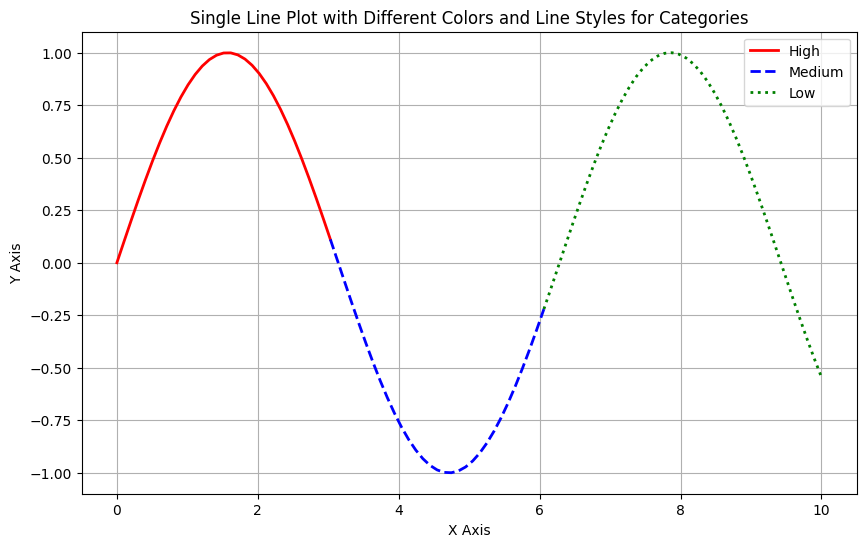

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)  # Example data, you can replace with your actual data

# Define segments for different categories
segment_indices = [0, 30, 60, 99]  # Indices to split the line into segments

# Define colors and line styles for each category
colors = ['red', 'blue', 'green']
line_styles = ['-', '--', ':']

# Plotting the line with segments of different colors and line styles
plt.figure(figsize=(10, 6))

# Plot the line in segments with different colors and line styles
for i in range(len(segment_indices) - 1):
    start_idx = segment_indices[i]
    end_idx = segment_indices[i + 1]
    plt.plot(x[start_idx:end_idx+1], y[start_idx:end_idx+1], color=colors[i], linestyle=line_styles[i], linewidth=2, label=['High', 'Medium', 'Low'][i])

# Adding labels, title, and legend
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Single Line Plot with Different Colors and Line Styles for Categories')
plt.legend()

# Display plot
plt.grid(True)
plt.show()
